In [1]:
import pandas as pd
from sqlalchemy import create_engine

db_user = "root"
db_password = "12341234"
db_host = "localhost"
db_port = "3306"
db_name = "miniproject"

engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

df = pd.read_sql("SELECT * FROM seoul_analysis_view", engine)
df.head()


,district_id,district_name,year,population,population_diff,car_count,car_diff
0,1,종로구,2021,156567,-5417,50049,-11
1,1,종로구,2022,153684,-2883,50832,783
2,1,종로구,2023,152212,-1472,51000,168
3,1,종로구,2024,150550,-1662,50482,-518
4,1,종로구,2025,149478,-1072,50083,-399


In [ ]:
# 자치구 단위 데이터 구성

df_cluster = (
    df.groupby("district_id")
      .agg({
          "population": "mean",
          "car_count": "mean"
      })
      .reset_index()
)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 군집 변수 선택
X = df_cluster[["population", "car_count"]]


# 표준화
X_scaled = StandardScaler().fit_transform(X)

# K-means 군집 적용
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["cluster"] = kmeans.fit_predict(X_scaled)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


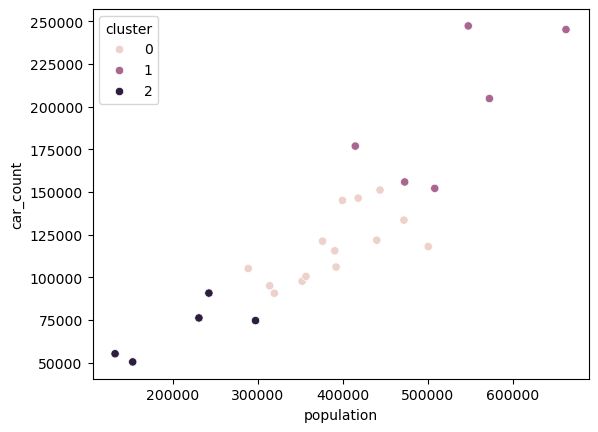

In [6]:
# 군집 결과 시각화
sns.scatterplot(
    data=df_cluster,
    x="population",
    y="car_count",
    hue="cluster"
)
plt.show()


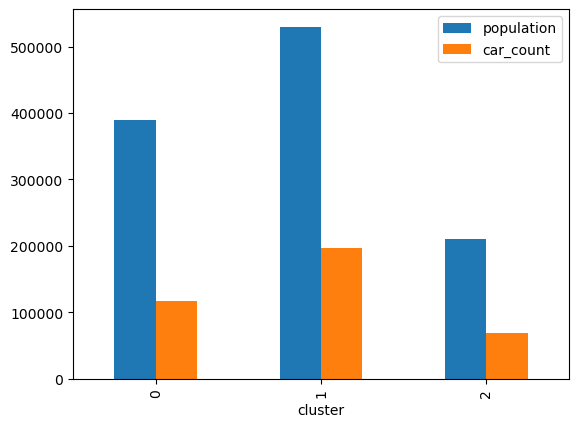

In [7]:
# 군집별 특성 비교

df_cluster.groupby("cluster")[
    ["population", "car_count"]
].mean().plot(kind="bar")
plt.show()
